In [2]:
!pip install --user gensim

  Using cached gensim-4.2.0-cp39-cp39-win_amd64.whl (23.9 MB)
  Using cached Cython-0.29.28-py2.py3-none-any.whl (983 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [4]:
glove_vectors = gensim.downloader.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [5]:
glove_vectors.most_similar('twitter')

[('facebook', 0.948005199432373),
 ('tweet', 0.9403423070907593),
 ('fb', 0.9342359900474548),
 ('instagram', 0.9104822874069214),
 ('chat', 0.8964964747428894),
 ('hashtag', 0.8885936737060547),
 ('tweets', 0.8878158330917358),
 ('tl', 0.8778460621833801),
 ('link', 0.877821147441864),
 ('internet', 0.8753897547721863)]

In [8]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [9]:
model = Word2Vec.load("word2vec.model")
model.train([["hello", "world"]], total_examples=1, epochs=1)

(0, 2)

In [11]:
vector = model.wv['computer']  # get numpy vector of a word
sims = model.wv.most_similar('computer', topn=10) 
sims

[('system', 0.21617144346237183),
 ('survey', 0.044689204543828964),
 ('interface', 0.01520337164402008),
 ('time', 0.0019510634010657668),
 ('trees', -0.032843153923749924),
 ('human', -0.0742427185177803),
 ('response', -0.09317589551210403),
 ('graph', -0.09575346857309341),
 ('eps', -0.10513806343078613),
 ('user', -0.16911624372005463)]

In [12]:
word2vec_model = gensim.downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
%matplotlib inline

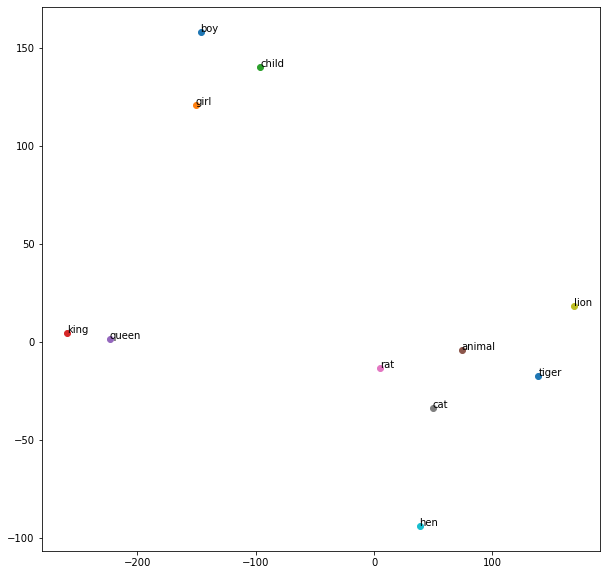

In [24]:
vocab = ['boy', 'girl', 'child', 'king', 'queen', 'animal', 'rat', 'cat', 'lion', 'hen', 'tiger']

def tsne_plot(model):
    wordvec = []
    label =[]
    
    for word in vocab:
        wordvec.append(model[word])
        label.append(word)

    tsne = TSNE(perplexity =3, random_state = 42)
    coordinates = tsne.fit_transform(wordvec)
    
    x,y = [], []
    for value in coordinates :
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize = (10,10))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(label[i], xy = (x[i],y[i]))
    plt.show()
    
tsne_plot(word2vec_model)

In [18]:
word2vec_model["beautiful"]

array([-0.01831055,  0.05566406, -0.01153564,  0.07275391,  0.15136719,
       -0.06176758,  0.20605469, -0.15332031, -0.05908203,  0.22851562,
       -0.06445312, -0.22851562, -0.09472656, -0.03344727,  0.24707031,
        0.05541992, -0.00921631,  0.1328125 , -0.15429688,  0.08105469,
       -0.07373047,  0.24316406,  0.12353516, -0.09277344,  0.08203125,
        0.06494141,  0.15722656,  0.11279297, -0.0612793 , -0.296875  ,
       -0.13378906,  0.234375  ,  0.09765625,  0.17773438,  0.06689453,
       -0.27539062,  0.06445312, -0.13867188, -0.08886719,  0.171875  ,
        0.07861328, -0.10058594,  0.23925781,  0.03808594,  0.18652344,
       -0.11279297,  0.22558594,  0.10986328, -0.11865234,  0.02026367,
        0.11376953,  0.09570312,  0.29492188,  0.08251953, -0.05444336,
       -0.0090332 , -0.0625    , -0.17578125, -0.08154297,  0.01062012,
       -0.04736328, -0.08544922, -0.19042969, -0.30273438,  0.07617188,
        0.125     , -0.05932617,  0.03833008, -0.03564453,  0.24

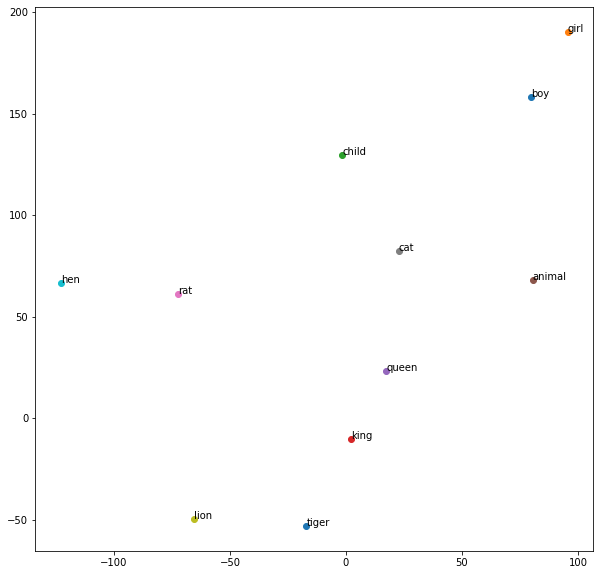

In [25]:
tsne_plot(glove_vectors)